In [1]:
library(GLMsData)
data(manuka)

In [2]:
str(manuka)

'data.frame':	20 obs. of  6 variables:
 $ Aetiology: Factor w/ 4 levels "A","M","P","V": 4 4 4 4 4 4 4 4 4 4 ...
 $ Duration : int  52 52 52 2 52 12 6 20 52 52 ...
 $ Size0    : num  4.3 2.4 7.3 4.3 3.5 10.3 0.6 0.7 18.3 16.1 ...
 $ Size2    : num  4 1.5 2.9 1.4 0.1 6 0.6 1.1 13.1 18.1 ...
 $ pH0      : num  7.26 7.63 7.63 7.18 7.75 7.94 7.6 7.9 7.6 7.7 ...
 $ pH2      : num  7.15 7.15 7.5 7.15 6.69 7.56 5.52 7.7 7.76 7.42 ...


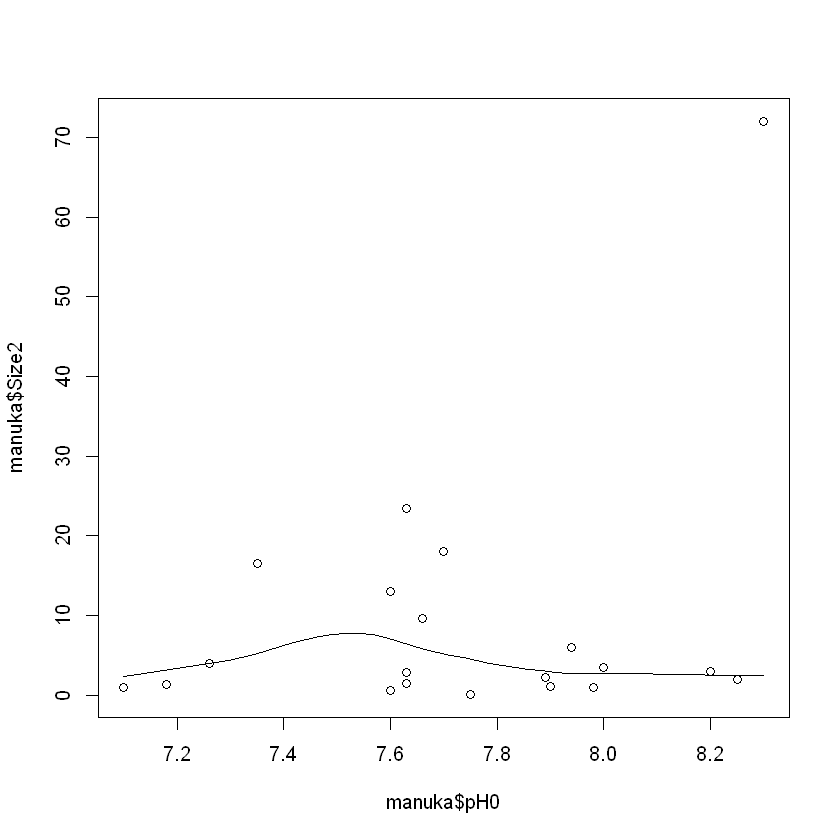

In [3]:
scatter.smooth(manuka$Size2 ~ manuka$pH0)

In [4]:
lm.1 <- lm(Size2 ~ pH0, data=manuka)

In [5]:
summary(lm.1)


Call:
lm(formula = Size2 ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.723  -9.440  -5.542   2.652  54.553 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -102.69      83.31  -1.233    0.234
pH0            14.47      10.77   1.344    0.196

Residual standard error: 15.92 on 18 degrees of freedom
Multiple R-squared:  0.09118,	Adjusted R-squared:  0.04069 
F-statistic: 1.806 on 1 and 18 DF,  p-value: 0.1957


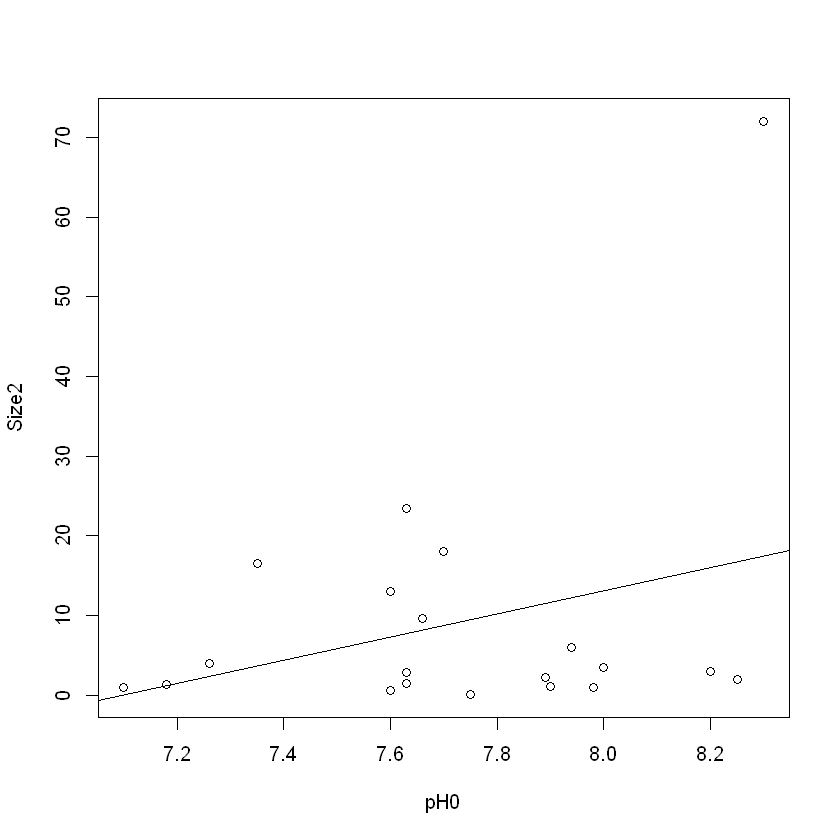

In [6]:
plot(Size2 ~ pH0, data=manuka)
abline(lm.1)

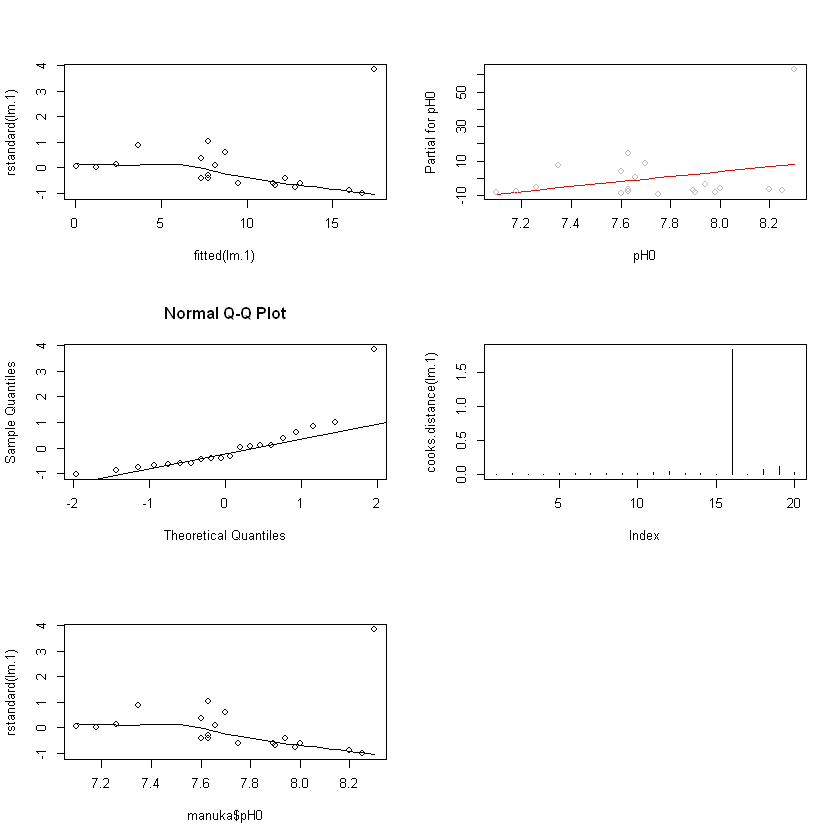

In [7]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="pH0")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")
scatter.smooth(rstandard(lm.1) ~ manuka$pH0)

In [8]:
thres <- qf(0.5, 1, 18)

In [9]:
thres

[1] 0.4738447

In [10]:
index <- which(cooks.distance(lm.1) > thres)

In [11]:
index

16 
16

In [12]:
lm.2 <- lm(Size2 ~ pH0, data=manuka, subset = (-index))

In [13]:
summary(lm.2)


Call:
lm(formula = Size2 ~ pH0, data = manuka, subset = (-index))

Residuals:
   Min     1Q Median     3Q    Max 
-6.880 -4.323 -2.899  2.296 17.419 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   31.982     39.986   0.800    0.435
pH0           -3.395      5.190  -0.654    0.522

Residual standard error: 7.04 on 17 degrees of freedom
Multiple R-squared:  0.02454,	Adjusted R-squared:  -0.03284 
F-statistic: 0.4277 on 1 and 17 DF,  p-value: 0.5219


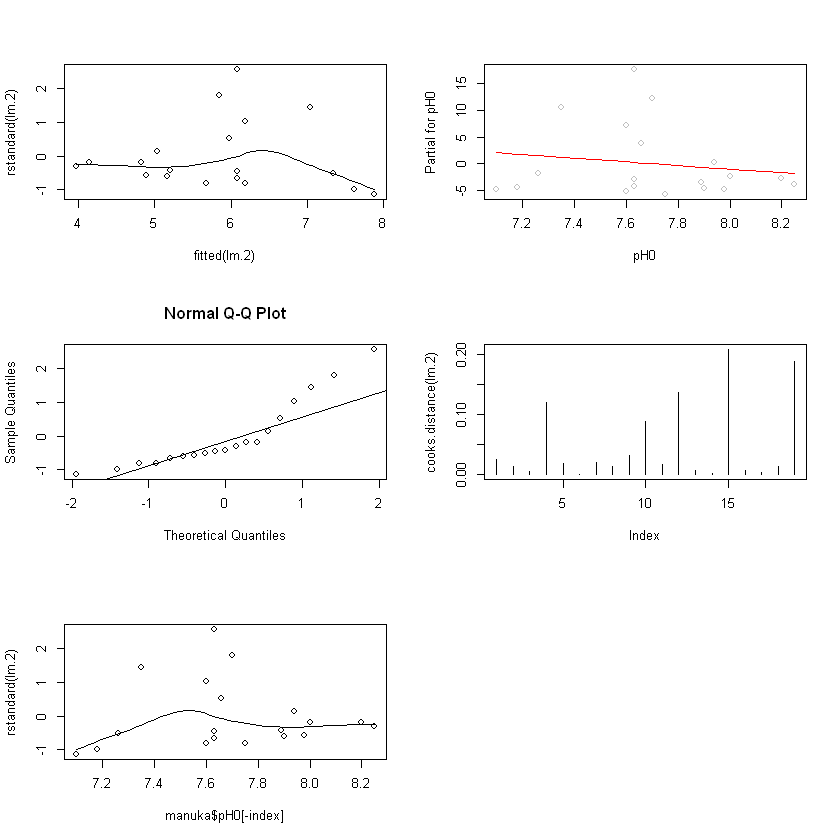

In [15]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.2) ~ fitted(lm.2))
termplot(lm.2, partial.resid = TRUE, terms="pH0")
qqnorm(rstandard(lm.2))
qqline(rstandard(lm.2))
plot(cooks.distance(lm.2), type="h")
scatter.smooth(rstandard(lm.2) ~ manuka$pH0[-index])

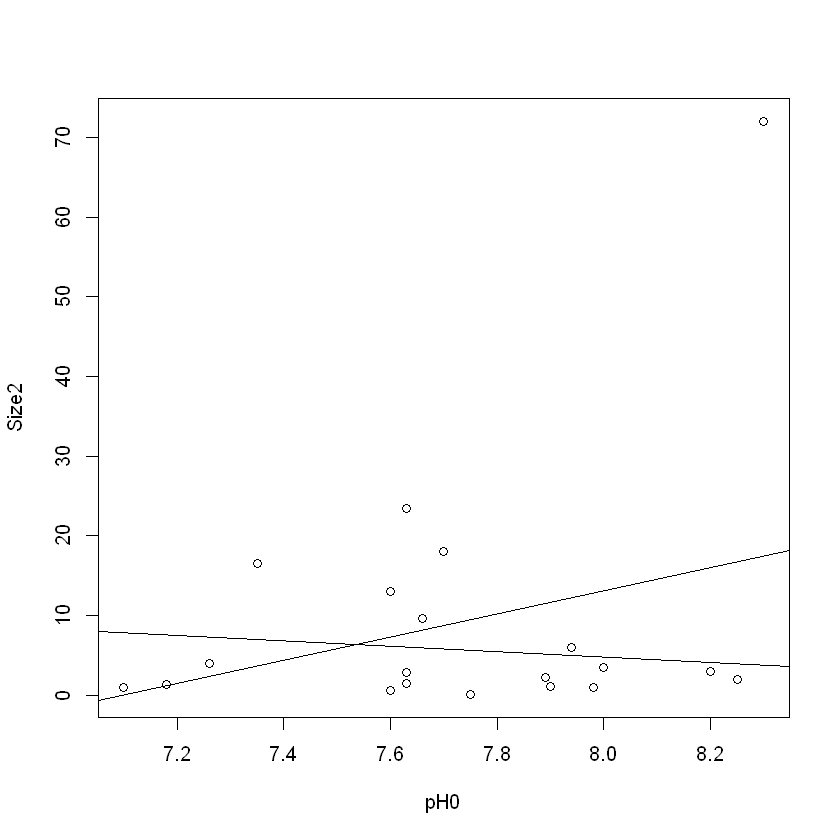

In [16]:
plot(Size2 ~ pH0, data=manuka)
abline(lm.1, label=)
abline(lm.2)